# Business Logic
Github is one of the primary sources of version control, source control, as well as a great place for open source projects. Using this popularity can we make some rough statements about language popularity, growth, and choice? Simply put, yes, but there’s always something to learn.

Before we start exploring the data, we have a few questions we want to ask.

What are the most popular languages overall?
What were the most popular languages at the earliest data point?
What were the most popular languages at the most recent data point?
What languages have grown the fastest?
What languages have stayed high in popularity the longest?

The reason these questions are important is that new engineers are constantly starting by picking a "popular" language.  This usually means there's a lot of resources, other engineers to help, and most importantly sample code.  So with our mission clear, let's look at our data!

# Data Logic
Our data is broken into three files, a count of issues per language, per year, per quarter.  The same format for PRs but the format differs with repos.  

Instead of counts per year and quarter we have counts of repos per language without date and year infomration.  This means repo counts can help inform our decisions but cannot be our main source of data.  This leaves PRs and Issues witch seems fine to me.  PRs and Issues work as great compases to the popularity and use of a language on github.

In [64]:
#  import libraries
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

# load data function
def load_data(data_file_name):
    try:
      print("Loading data...")
      data = pd.read_csv("data/" + data_file_name)
      data.head()
      print("Data loaded.")
      return data
    except:
        print("Data didn't load, bailing on program.")
        # quit app because data failed to load
        quit()


# Load Data
df_repos = load_data("repos.csv")
df_prs = load_data("prs.csv")
df_issues = load_data("issues.csv")  

# Prepare Data

In [88]:
# prepare dataframes for analysis by cleaning them
# start by removing none values, and then remove duplicates

# get the count of none values
print(df_repos.isnull().sum())
# get the count of duplicates
print(df_repos.duplicated().sum())
df_repos = df_repos.dropna()
df_repos = df_repos.drop_duplicates()

# get the count of none values
print(df_issues.isnull().sum())
# get the count of duplicates
print(df_issues.duplicated().sum())
df_issues = df_issues.dropna()
df_issues = df_issues.drop_duplicates()

# get the count of none values
print(df_prs.isnull().sum())
# get the count of duplicates
print(df_prs.duplicated().sum())
df_prs = df_prs.dropna()
df_prs = df_prs.drop_duplicates()

# Looks like our data is already clean, but we still checked the usual issues. We can continue knowing that our data is clean.

language     0
num_repos    0
dtype: int64
0
name       0
year       0
quarter    0
count      0
dtype: int64
0
name       0
year       0
quarter    0
count      0
dtype: int64
0


In [89]:
# sum and group pr_count by name and year then sort by pr_count
df_prs_grouped_by_language = df_prs.groupby(['name']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()
df_prs_grouped_by_year = df_prs.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()

In [90]:
# sum and group issues_count by name and year then sort by issues_count
df_issues_grouped_by_language = df_issues.groupby(['name']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()
df_issues_grouped_by_year = df_issues.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()

## What are the most popular languages overall?

To answer this question we need to plot the top languages by counts.
We can then compare them by year, by their growth (or lack thereof), as well as totals.

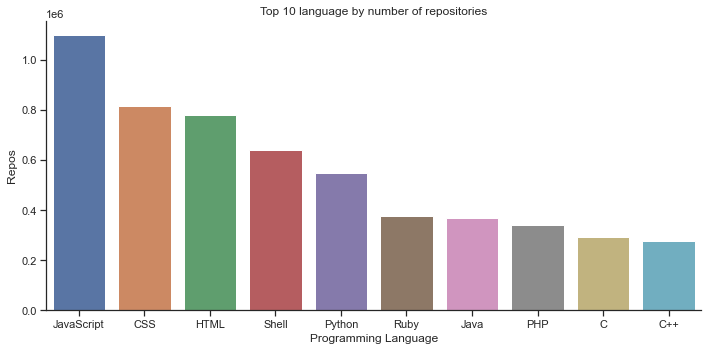

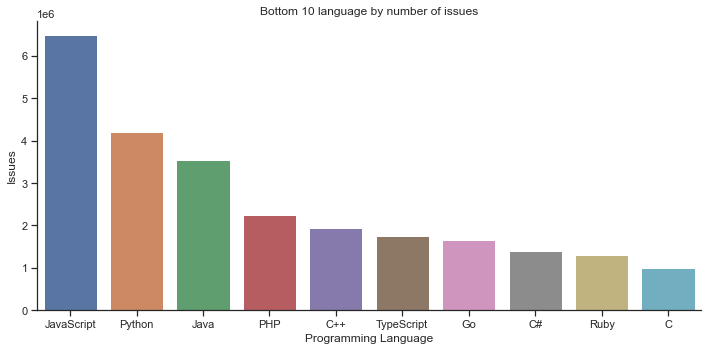

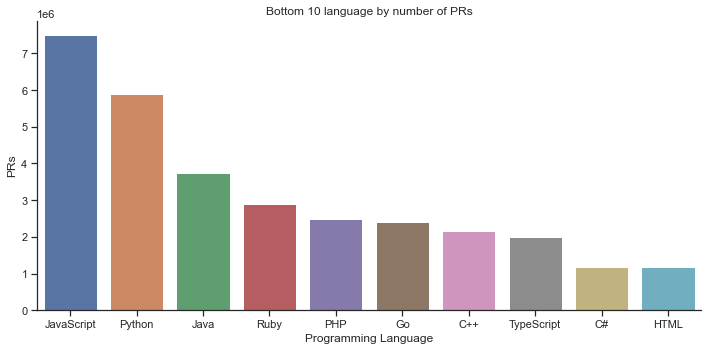

In [91]:
# if you use repos here's the top 10...
sns.catplot(x="language", y="num_repos",
                             kind="bar",
                             height=5, aspect=2,
                             data=df_repos.head(10)).set(title=f"Top 10 language by number of repositories").set_xlabels("Programming Language").set_ylabels("Repos")
# if you use issues here's the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_grouped_by_language.head(10)).set(title=f"Bottom 10 language by number of issues").set_xlabels("Programming Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_grouped_by_language.head(10)).set(title=f"Bottom 10 language by number of PRs").set_xlabels("Programming Language").set_ylabels("PRs")


### Results:
We can assume from this that the over-all popularity of Javascript by repo count is very important.
While we cannot be sure of repo count at earlier years due to the lack of quarter and yearly repo data we can still tell that Javascript simply has a lot of code moving around.

Looking at the second and third charts we can see Javascript is first place for both other metrics (over all time).  

An interesting result is Python, which is second place in PRs and Issues but a much lower number of repos, less than half, of Javascript. 
Does this mean Python is more open, collaborative language than Javascript?  

## What were the most popular languages at the earliest data point?
In order to find how language popularity has drifted from our earliest available data points to our most recently available data points I've started with the issues count and pr count all at our earliest year (2011).  

I will later compare this data to over-time and later data points.

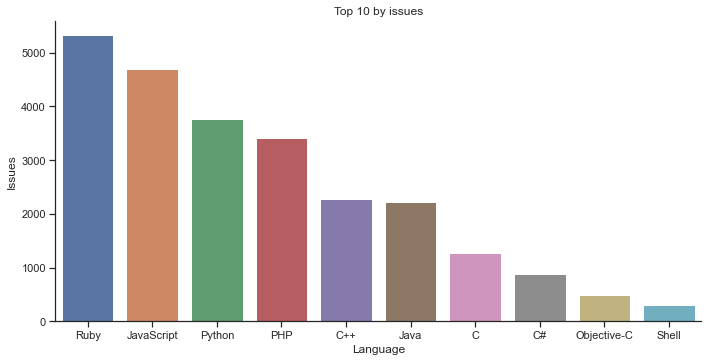

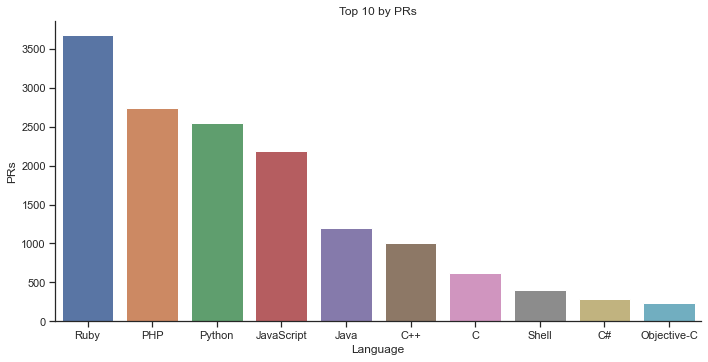

In [92]:
# lets make the dataframes
df_issues_2011 = df_issues_grouped_by_year[df_issues_grouped_by_year['year'] == 2011]
df_prs_2011 = df_prs_grouped_by_year[df_prs_grouped_by_year['year'] == 2011]

# if you use issues here's the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_2011.head(10)).set(title=f"Top 10 by issues").set_xlabels("Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_2011.head(10)).set(title=f"Top 10 by PRs").set_xlabels("Language").set_ylabels("PRs")


### Results
At the earliest point of our data Ruby is near the top of our language list in terms of both PRs and Issues.  At the time Ruby as well as PHP were very popular languages and were used primarily for web development.  Which was booming in 2011.  We can see Javascript AND python still in the top 5 during this period but they are both much less popular than today.

## What were the most popular languages at the most recent data point?
Now we get the counts of PRs, issues, and repo counts at our most recent data points so that we can compare counts and trends from our earlier data.  We are currently ignore 2022 due to this year being "incomplete".  So 2011 is being compared to 2021, a decade spread in counts.  For now, though, lets get the most recent year of counts so we are compare to the results above.

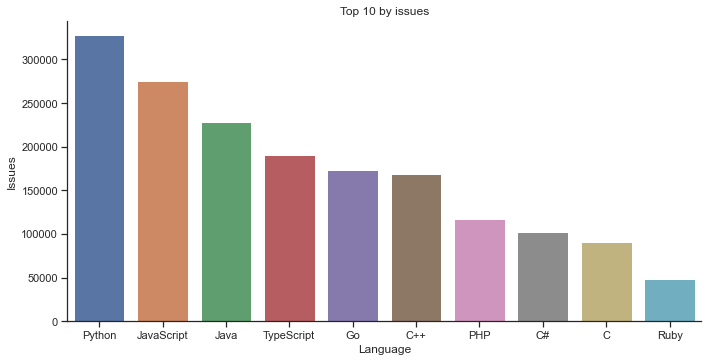

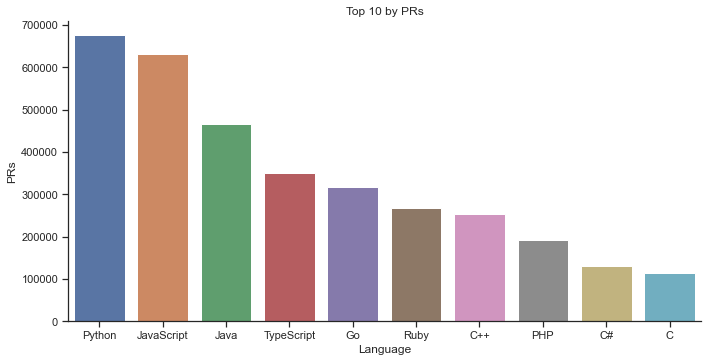

In [93]:
# making more dataframes...
df_issues_2021 = df_issues_grouped_by_year[df_issues_grouped_by_year['year'] == 2021]
df_prs_2021 = df_prs_grouped_by_year[df_prs_grouped_by_year['year'] == 2021]

#I'm not doing 2022 here because the year has just begun.
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_2021.head(10)).set(title=f"Top 10 by issues").set_xlabels("Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_2021.head(10)).set(title=f"Top 10 by PRs").set_xlabels("Language").set_ylabels("PRs")


### Results
Currently 2021 shows us that Python has actually overtaken javascript for popularity.  While not much has experienced the meteoric rise Javascript has we can also see that Javascript has cooled down enough for Python to overtake it.  

## What languages have grown the fastest?


In [94]:
# calculate fastest growing by sum name year over year
df_issues_grouped_by_year_growth = df_issues.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()
df_prs_grouped_by_year_growth = df_prs.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()

# View fastest growing languages by issues
print(df_issues_grouped_by_year_growth.head(10))
print(df_prs_grouped_by_year_growth.head(10))

# We can easily see javascript and python are the fastest growing languages.
# Java is present but doesn't have the same repeated growth that python does.
# Leaving Java in a close third.


         name  year    count
0  JavaScript  2016  1256011
1  JavaScript  2017  1232611
2  JavaScript  2015  1036613
3  JavaScript  2018   733108
4      Python  2017   723965
5        Java  2017   682631
6      Python  2016   626769
7        Java  2016   601289
8  JavaScript  2014   596429
9  JavaScript  2019   535947
         name  year    count
0  JavaScript  2016  1479882
1  JavaScript  2017  1477140
2      Python  2017   970465
3  JavaScript  2015   841002
4  JavaScript  2018   826691
5  JavaScript  2020   817650
6      Python  2020   809805
7      Python  2016   798616
8  JavaScript  2019   787866
9      Python  2019   770913


## What languages have stayed high in popularity the longest?

We want to grab the biggest counts of year to year variability so we can compare the top PRs, top Issues, etc. hopefully this backs up our previous section and shows that javascript and python are the two top growers almost every year.

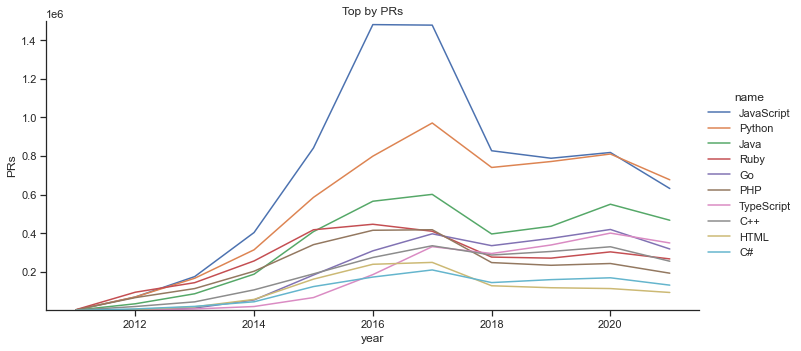

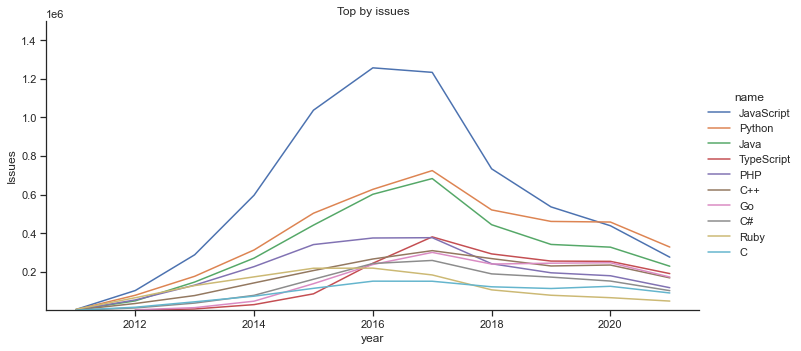

In [95]:
# build dataframes for top prs
df_top_prs = df_prs.groupby(["name"]).agg({'count': 'sum'}).sort_values("count", ascending=0).head(10).reset_index()["name"].unique()
df_top_pr_grouped = df_prs_grouped_by_year[df_prs_grouped_by_year['name'].isin(df_top_prs)]

# build dataframes for top issues
df_top_issues = df_issues.groupby(["name"]).agg({'count': 'sum'}).sort_values("count", ascending=0).head(10).reset_index()["name"].unique()
df_top_issues_grouped = df_issues_grouped_by_year[df_issues_grouped_by_year['name'].isin(df_top_issues)]

# plot
sns.relplot(x="year", y="count", 
                         kind="line",
                         hue="name",
                         height=5, aspect=2,
                         data=df_top_pr_grouped).set(title="Top by PRs").set(ylim=(500, 1500000)).set_ylabels("PRs")

# plot
sns.relplot(x="year", y="count", 
                         kind="line",
                         hue="name",
                         height=5, aspect=2,
                         data=df_top_issues_grouped).set(title="Top by issues").set(ylim=(500, 1500000)).set_ylabels("Issues")

### RESULTS
We can see on these charts just how extreme Javascripts rise and apparent fall have been.  Python has ridden the close second place for a long time.  And now we finally see python gaining enough and Javascript losing enough momentum for their positions to switch.  This being said the stickiness of Java is commendable, though it's to be expected for a language where the JVM (Java Virtual Machine) has had well over a billion dollars of investment in it.

# Evaluate The Results
## If we had to pick a language to learn which one should we do?

Taking in all the data we have seen and exposed, we can see that Javascript is still a mainstay in our development lifecycle, if it's not NODE it's something along the lines of REACT or NEXTJS.  While Python having become the de facto tool of data scientists and data engineers of all shapes and sizes (Tesla, CommaAI, Google, etc.) is one likely point of growth making Python the now most popular choice.

Javascript has had the most popular moniker for some time and would definitely be a solid choice for a new engineer due to the maturity of the tooling, the language as a whole, and the ability to use the same language cross stack as well as in the browser.

Python would be my second choice, not just due to the use in data science but as time goes it it's apparent Python will continue to grow.  With the shift to Python 3 (finally!) the package ecosystem is slowly growing to be more and more mature.  I can easily see pythons popularity to continue to grow.

In short, Python is my top recommendation for a new engineer but Javascript is a very close second.
